WEEK-14,ASS NO-06

Q1. What is Elastic Net Regression and how does it differ from other regression techniques?

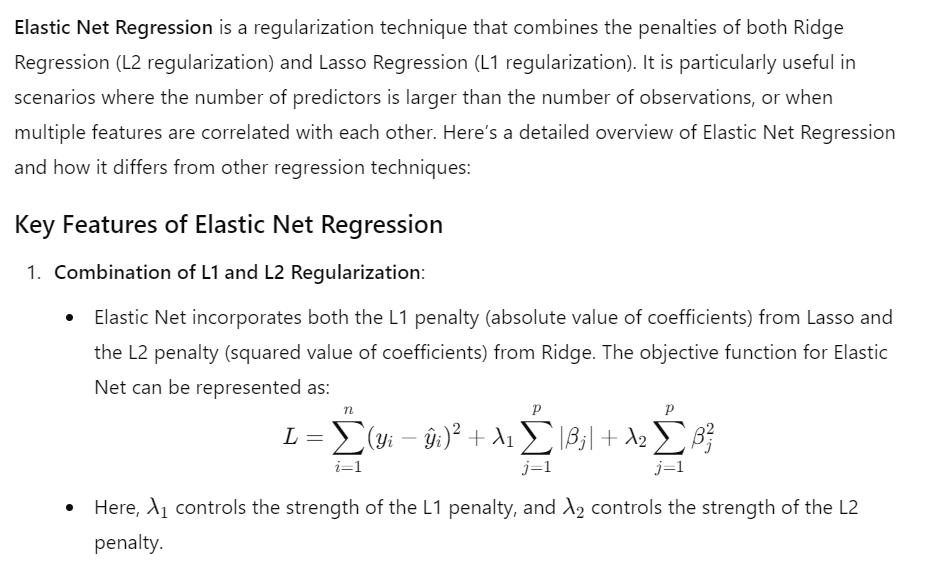

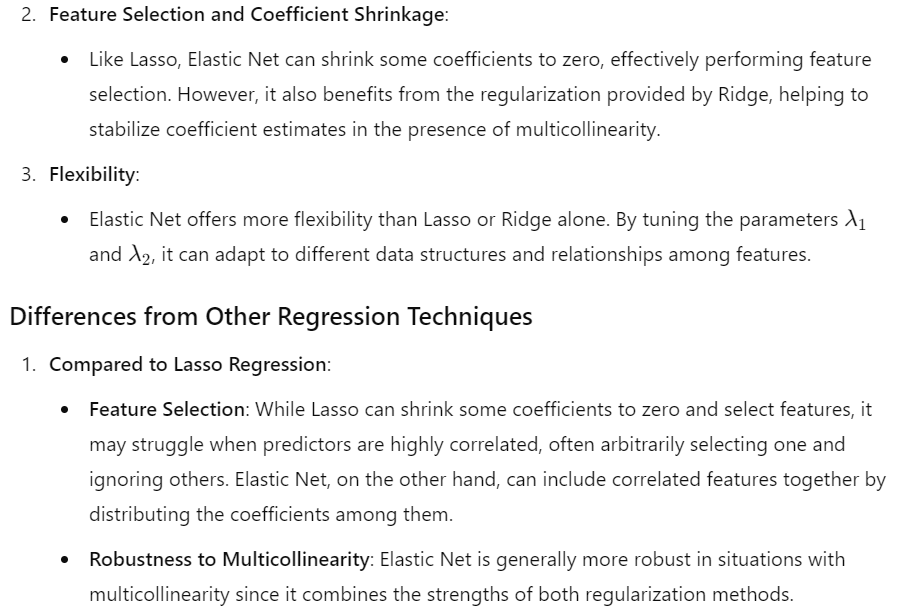

 
 

2. **Compared to Ridge Regression**:
   - **Feature Selection Capability**: Ridge Regression includes all predictors and shrinks their coefficients but does not set any to zero. Elastic Net can perform variable selection by zeroing out some coefficients while still leveraging the benefits of L2 regularization for stability.
   - **Handling Highly Correlated Features**: While Ridge handles multicollinearity well, it does not reduce the number of predictors. Elastic Net addresses multicollinearity while also allowing for feature selection.

3. **Compared to Ordinary Least Squares (OLS) Regression**:
   - **Overfitting Prevention**: OLS does not include any regularization, making it more prone to overfitting, especially in high-dimensional datasets. Elastic Net mitigates this risk through regularization, leading to better generalization on unseen data.
   - **Model Complexity**: Elastic Net tends to produce simpler models by reducing the number of predictors through feature selection, while OLS may retain many features, complicating interpretation and model performance.

### When to Use Elastic Net Regression

- **High-Dimensional Data**: When the number of features is large compared to the number of observations.
- **Multicollinearity**: When many predictors are correlated, which can complicate the estimates in traditional methods.
- **Combining Benefits**: When you want to benefit from both Lasso’s feature selection and Ridge’s stability.

 

Q2. How do you choose the optimal values of the regularization parameters for Elastic Net Regression?

Choosing the optimal values of the regularization parameters for Elastic Net Regression is essential for balancing model complexity and performance. Elastic Net has two regularization parameters: \( \lambda_1 \) for L1 regularization (Lasso) and \( \lambda_2 \) for L2 regularization (Ridge). Here are several methods to determine the optimal values of these parameters:

### 1. **Cross-Validation**

Cross-validation is the most widely used technique for selecting the optimal values of \( \lambda_1 \) and \( \lambda_2 \). The process typically involves the following steps:

- **Split the Data**: Divide the dataset into training and validation sets, often using k-fold cross-validation.
  
- **Define a Range of Values**: Create a grid of candidate values for both \( \lambda_1 \) and \( \lambda_2 \) (usually on a logarithmic scale). This can be a 2D grid where one axis represents \( \lambda_1 \) and the other represents \( \lambda_2 \).

- **Train the Model**: For each combination of \( \lambda_1 \) and \( \lambda_2 \), fit the Elastic Net model to the training data.

- **Evaluate Performance**: Calculate the performance metric (e.g., Mean Squared Error, RMSE, MAE) on the validation set for each combination.

- **Select Optimal Parameters**: Choose the combination of \( \lambda_1 \) and \( \lambda_2 \) that minimizes the validation error.

### 2. **Grid Search**

- **Automated Approach**: Utilize grid search techniques that systematically explore the parameter space of \( \lambda_1 \) and \( \lambda_2 \).
  
- **Use Libraries**: Libraries such as Scikit-Learn provide the `ElasticNetCV` class, which implements cross-validation as part of the grid search process.

### Example of Grid Search with Elastic Net in Scikit-Learn

```python
from sklearn.linear_model import ElasticNetCV

# Define a range for lambda_1 and lambda_2
alphas = [0.001, 0.01, 0.1, 1, 10]
l1_ratios = [0.1, 0.5, 0.9]  # Ratios for L1 vs L2

# Create ElasticNetCV object
elastic_net_cv = ElasticNetCV(alphas=alphas, l1_ratio=l1_ratios, cv=5)

# Fit the model to the training data
elastic_net_cv.fit(X_train, y_train)

# Optimal parameters
optimal_lambda_1 = elastic_net_cv.alpha_
optimal_lambda_2 = elastic_net_cv.l1_ratio
```

### 3. **Regularization Path**

- **Visualize Coefficient Paths**: Many implementations allow for plotting the regularization path to see how coefficients change as \( \lambda_1 \) and \( \lambda_2 \) vary.
  
- **Analyze Stability**: Look for stability in coefficient estimates, indicating a suitable choice of parameters.

### 4. **Information Criteria**

Using information criteria such as Akaike Information Criterion (AIC) or Bayesian Information Criterion (BIC) can also help in selecting \( \lambda_1 \) and \( \lambda_2 \):

- **Fit Models**: Fit Elastic Net models across a range of \( \lambda_1 \) and \( \lambda_2 \) values.

- **Calculate AIC/BIC**: For each model, calculate the AIC or BIC.

- **Choose λ Values**: Select the combination that yields the lowest AIC or BIC.

### 5. **Use of Automated Libraries**

Many libraries, such as Scikit-Learn, offer built-in functionality for Elastic Net that automates the selection of the optimal regularization parameters through cross-validation:

- **Example**:

```python
from sklearn.linear_model import ElasticNetCV

# Initialize the ElasticNetCV object
elastic_net_cv = ElasticNetCV(cv=5)

# Fit the model on the data
elastic_net_cv.fit(X_train, y_train)

# Retrieve the best alpha and l1_ratio
best_alpha = elastic_net_cv.alpha_
best_l1_ratio = elastic_net_cv.l1_ratio_
```



Q3. What are the advantages and disadvantages of Elastic Net Regression?

Elastic Net Regression is a powerful technique that combines the benefits of both Lasso and Ridge regression. Here are the key advantages and disadvantages of Elastic Net Regression:

### Advantages

1. **Combines Lasso and Ridge**:
   - Elastic Net captures the strengths of both Lasso (L1 regularization) and Ridge (L2 regularization). This makes it effective in scenarios where predictors are highly correlated and helps in feature selection while maintaining the stability of coefficient estimates.

2. **Feature Selection**:
   - Like Lasso, Elastic Net can shrink some coefficients to zero, effectively performing feature selection. This can result in a simpler model that is easier to interpret and less prone to overfitting.

3. **Robust to Multicollinearity**:
   - Elastic Net is particularly beneficial in datasets with multicollinearity (where predictors are correlated). It stabilizes the coefficient estimates by combining the regularization methods, allowing for better performance compared to Lasso or Ridge alone.

4. **Flexibility**:
   - The two parameters (\( \lambda_1 \) and \( \lambda_2 \)) in Elastic Net allow for greater flexibility in controlling the amount of regularization applied. This adaptability helps to better fit a variety of data structures.

5. **Better Generalization**:
   - By preventing overfitting through regularization, Elastic Net can lead to models that generalize better to unseen data compared to OLS regression, especially in high-dimensional settings.

6. **Works Well in High-Dimensional Spaces**:
   - Elastic Net is well-suited for high-dimensional datasets where the number of predictors exceeds the number of observations, making it a popular choice in fields like genomics and text analysis.

### Disadvantages

1. **Complexity**:
   - With two regularization parameters to tune (\( \lambda_1 \) and \( \lambda_2 \)), Elastic Net can be more complex to optimize compared to Lasso or Ridge alone. This may require more computational resources and time.

2. **Tuning Parameters**:
   - Selecting the optimal values for \( \lambda_1 \) and \( \lambda_2 \) can be challenging, requiring techniques like cross-validation, which can increase computational demands.

3. **Interpretability**:
   - Although Elastic Net performs feature selection, the inclusion of both L1 and L2 penalties can make the interpretation of coefficients more complicated than Lasso alone, particularly in the presence of correlated features.

4. **Dependency on Parameter Tuning**:
   - The performance of Elastic Net is sensitive to the choice of regularization parameters. Poor tuning can lead to underfitting or overfitting, affecting model accuracy.

5. **Assumption of Linearity**:
   - Like other linear regression techniques, Elastic Net assumes a linear relationship between predictors and the response variable. If the relationship is non-linear, additional transformations or polynomial features may be needed.

Q4. What are some common use cases for Elastic Net Regression?

Elastic Net Regression is a versatile modeling technique that is particularly useful in a variety of scenarios, especially when dealing with high-dimensional data or multicollinearity. Here are some common use cases for Elastic Net Regression:

### 1. **Genomics and Bioinformatics**
   - **High-Dimensional Data**: In genomics, datasets often contain a large number of features (e.g., gene expressions) relative to the number of samples. Elastic Net helps identify significant predictors while managing multicollinearity among gene variables.
   - **Disease Prediction**: Elastic Net is frequently used in models that predict diseases based on genomic data, where the goal is to select relevant genetic markers.

### 2. **Text Analysis and Natural Language Processing (NLP)**
   - **Feature Selection**: When analyzing text data, the number of potential features (words or phrases) can be vast. Elastic Net can be employed to select the most important features while controlling for overfitting.
   - **Topic Modeling**: In topic modeling and sentiment analysis, Elastic Net can help in building predictive models that relate text data to various outcomes, such as customer satisfaction or product quality.

### 3. **Finance and Economics**
   - **Predictive Modeling**: In financial forecasting, Elastic Net can be applied to predict stock prices, market trends, or credit risk by incorporating a large number of economic indicators and financial metrics.
   - **Portfolio Optimization**: Elastic Net can help identify the most relevant features for optimizing asset allocation in investment portfolios.

### 4. **Medical Research**
   - **Clinical Outcome Prediction**: In clinical studies, Elastic Net is used to predict patient outcomes based on a variety of clinical measurements and demographic variables. It can help identify the most influential risk factors.
   - **Healthcare Cost Prediction**: Elastic Net can model healthcare costs by considering numerous variables related to patient characteristics, treatment types, and medical histories.

### 5. **Marketing and Customer Analytics**
   - **Customer Segmentation**: Elastic Net can assist in identifying significant features that influence customer behavior, enabling businesses to tailor marketing strategies and improve customer retention.
   - **Churn Prediction**: In customer churn models, Elastic Net can help pinpoint the most critical predictors of customer attrition while managing multicollinearity.

### 6. **Environmental Science**
   - **Ecological Modeling**: Elastic Net is utilized in modeling ecological data, where it can help identify factors affecting species distribution or the impact of environmental variables on biodiversity.
   - **Climate Change Analysis**: In studies assessing the impacts of climate change, Elastic Net can analyze various climatic and non-climatic factors affecting environmental outcomes.

### 7. **Social Sciences and Psychology**
   - **Behavioral Modeling**: In social sciences, Elastic Net can help analyze factors influencing behavior, attitudes, or social outcomes by effectively selecting and interpreting relevant variables.
   - **Survey Data Analysis**: Elastic Net can be applied to survey data to identify significant predictors of opinions, preferences, or behaviors, even in the presence of many correlated features.

### 8. **Image Processing**
   - **Feature Extraction**: In image analysis tasks, Elastic Net can be used for feature selection when dealing with high-dimensional pixel data or image features, helping to improve classification models.

 

Q5. How do you interpret the coefficients in Elastic Net Regression?

Interpreting the coefficients in Elastic Net Regression involves understanding how each predictor variable contributes to the response variable while accounting for the effects of regularization. Here’s how to interpret the coefficients effectively:

### 1. **Coefficient Sign**
   - **Positive Coefficients**: A positive coefficient indicates a direct relationship between the predictor variable and the response variable. As the predictor increases, the response variable is expected to increase, assuming all other predictors are held constant.
   - **Negative Coefficients**: A negative coefficient suggests an inverse relationship. If the predictor increases, the response variable is expected to decrease, again holding all other predictors constant.

### 2. **Magnitude of Coefficients**
   - The absolute value of each coefficient indicates the strength of the relationship between the predictor and the response variable. A larger absolute value means a stronger influence on the response variable.
   - **Comparison of Coefficients**: In Elastic Net, coefficients are scaled. Therefore, comparing the magnitude of coefficients can help identify which predictors have a more substantial impact on the response variable. However, caution should be taken when interpreting coefficients of predictors with different units or scales.

### 3. **Impact of Regularization**
   - Elastic Net applies both L1 (Lasso) and L2 (Ridge) regularization, which can shrink coefficients toward zero. Some coefficients may become exactly zero, indicating that those predictors are not considered relevant to the model (i.e., they are excluded).
   - Coefficients that are not zero have been selected as significant predictors, and their values reflect the strength of their relationship with the response variable after accounting for regularization.

### 4. **Interpreting in the Context of Other Predictors**
   - Coefficients in Elastic Net are interpreted in the context of all other predictors. This means that the effect of one predictor variable is conditional on the values of the other predictors included in the model.
   - For example, if a coefficient for "hours studied" is 2, this indicates that for every additional hour studied, the exam score increases by 2 points, holding all other variables constant (e.g., previous knowledge, attendance).

### 5. **Standardization and Scaling**
   - If the predictors are standardized (mean-centered and scaled to unit variance), the coefficients represent the change in the response variable for a one standard deviation increase in the predictor. This can aid in interpretation across predictors measured on different scales.

### 6. **Use of Confidence Intervals**
   - Confidence intervals can provide additional context for interpreting coefficients. A narrow confidence interval suggests a more precise estimate of the coefficient, while a wide interval indicates uncertainty. If the interval includes zero, it suggests that the predictor may not be significantly associated with the response variable.

### Example Interpretation

Suppose an Elastic Net model predicts house prices based on several features, including square footage (coefficient = 0.5), number of bedrooms (coefficient = 10), and age of the house (coefficient = -2).

- **Square Footage**: For every additional square foot, the house price increases by $0.5, holding all other variables constant.
- **Number of Bedrooms**: Each additional bedroom is associated with a $10,000 increase in house price, assuming other factors remain unchanged.
- **Age of the House**: For each additional year of age, the house price decreases by $2,000, controlling for square footage and number of bedrooms.

  

Q6. How do you handle missing values when using Elastic Net Regression?

Handling missing values is an important step in preparing data for Elastic Net Regression (or any regression technique). Here are several strategies to deal with missing values effectively:

### 1. **Identify Missing Values**
   - Before addressing missing values, it is essential to identify them in the dataset. This can be done using functions that summarize the dataset, highlighting the number of missing entries for each feature.

### 2. **Imputation Methods**
   Depending on the nature of the data and the extent of missingness, you can choose from various imputation methods:

   - **Mean/Median/Mode Imputation**:
     - **Mean**: For continuous variables, replace missing values with the mean of the observed values.
     - **Median**: More robust to outliers than the mean; suitable for skewed distributions.
     - **Mode**: For categorical variables, replace missing values with the most frequent category.
     
   - **K-Nearest Neighbors (KNN) Imputation**:
     - This technique imputes missing values based on the values of the nearest neighbors in the dataset, considering the similarity of other feature values.
     
   - **Regression Imputation**:
     - Use a regression model to predict the missing values based on other available features. This can be useful when there is a strong correlation between the features.
     
   - **Multiple Imputation**:
     - This involves creating several different imputed datasets and combining results to account for uncertainty in missing data. Multiple imputation is particularly useful for datasets with a substantial amount of missingness.

   - **Indicator Variables**:
     - Create a binary indicator variable that signifies whether a value was missing for a particular feature. This can help capture information about the missingness itself.

### 3. **Remove Missing Data**
   - If the proportion of missing values is small (typically below 5-10%), you might consider removing those records from the dataset. However, this should be done cautiously to avoid losing valuable data.

### 4. **Use Algorithms that Handle Missing Values**
   - Some machine learning algorithms can inherently handle missing values (e.g., tree-based methods). If you opt to explore such alternatives before applying Elastic Net, you might find useful insights before preprocessing the data.

### 5. **Evaluate the Impact of Missing Values**
   - After imputing missing values, assess how the imputation method impacts your model’s performance. Cross-validation can help to determine whether the imputation significantly changes the results.

### 6. **Documentation and Reporting**
   - Document the methods used for handling missing values, including any assumptions made. This transparency is essential for reproducibility and for interpreting results.

### Example of Handling Missing Values

Suppose you have a dataset with the following features:

- Age (continuous)
- Income (continuous)
- Education Level (categorical)

1. **Identify Missing Values**: 
   - Check how many values are missing in each feature.

2. **Imputation**:
   - For **Age** and **Income**, if the data is normally distributed, replace missing values with the mean. If skewed, use the median.
   - For **Education Level**, replace missing values with the mode of the existing categories.

3. **Create Indicator Variables**: 
   - Add an indicator variable for Age and Income that marks whether the value was imputed (1 for imputed, 0 for original).

4. **Modeling**: 
   - Proceed with Elastic Net Regression using the imputed dataset.

 

Q7. How do you use Elastic Net Regression for feature selection?

Elastic Net Regression is particularly effective for feature selection due to its combination of L1 (Lasso) and L2 (Ridge) regularization. This dual approach allows it to manage multicollinearity while simultaneously performing variable selection. Here’s how you can use Elastic Net Regression for feature selection:

### 1. **Understanding Regularization**
   - **L1 Regularization (Lasso)**: Encourages sparsity in the coefficient estimates, which means that some coefficients can be exactly zero. This helps in selecting a subset of important features.
   - **L2 Regularization (Ridge)**: Shrinks coefficients but does not typically set them to zero, meaning it retains all features in the model but reduces their influence.

### 2. **Set Up Elastic Net Model**
   - **Regularization Parameter (λ)**: In Elastic Net, you have two parameters to tune: 
     - **λ** (lambda): Controls the overall strength of the regularization.
     - **α** (alpha): Controls the mix of L1 and L2 regularization. Setting α = 1 corresponds to Lasso, while α = 0 corresponds to Ridge. Values between 0 and 1 balance both types of regularization.

### 3. **Fit the Elastic Net Model**
   - Train the Elastic Net model on your dataset using a library such as `scikit-learn` in Python. You typically use cross-validation to determine the best combination of λ and α.
   
   ```python
   from sklearn.linear_model import ElasticNetCV

   # X: feature matrix, y: target variable
   model = ElasticNetCV(alphas=alpha_values, l1_ratio=[0.1, 0.5, 0.9], cv=5)
   model.fit(X, y)
   ```

### 4. **Evaluate Feature Importance**
   - After fitting the model, examine the coefficients of the features. Features with coefficients that are exactly zero are effectively excluded from the model and are thus not selected.
   - The non-zero coefficients represent the features that are selected as important predictors for the target variable.

### 5. **Feature Ranking**
   - The magnitude of the non-zero coefficients can be used to rank the selected features based on their importance. Larger absolute values indicate stronger influences on the response variable.

### 6. **Model Interpretation and Validation**
   - Analyze the selected features to understand their relevance in the context of the problem. 
   - Validate the performance of the model using metrics such as cross-validated R-squared, RMSE, or MAE to ensure that the selected features contribute to a robust model.

### 7. **Iterate and Refine**
   - You may want to iteratively adjust the values of λ and α, re-evaluating the model and selected features, particularly if the initial results are not satisfactory.
   - Consider using domain knowledge or exploratory data analysis to further refine feature selection.

### Example

Imagine you have a dataset with many features related to house pricing (e.g., square footage, number of bedrooms, age of the house, location, etc.). You want to select the most significant features affecting house prices.

1. **Preprocess Data**: Handle missing values, scale features, etc.
2. **Set Up and Fit Elastic Net**:
   ```python
   from sklearn.linear_model import ElasticNetCV

   X = ...  # feature matrix
   y = ...  # target variable (house price)
   model = ElasticNetCV(alphas=[0.1, 1.0, 10.0], l1_ratio=0.5, cv=5)
   model.fit(X, y)
   ```
3. **Evaluate Coefficients**:
   ```python
   coefficients = model.coef_
   selected_features = [feature for feature, coef in zip(feature_names, coefficients) if coef != 0]
   ```
4. **Analyze Results**:
   - Examine the `selected_features` to understand which features are influential in predicting house prices.

 

Q8. How do you pickle and unpickle a trained Elastic Net Regression model in Python?

Pickling is a method of serializing a Python object into a byte stream, which can be saved to a file for later use. Unpickling is the reverse process, where you convert the byte stream back into the original Python object. In the context of a trained Elastic Net Regression model, you can easily pickle and unpickle it using the `pickle` module in Python. Below are the steps and example code for both processes:

### Step-by-Step Guide

#### 1. Import Required Libraries
You need to import the necessary libraries, including `pickle` and `ElasticNet` from `sklearn`.

```python
import pickle
from sklearn.linear_model import ElasticNet
```

#### 2. Train Your Elastic Net Model
First, you need to train your Elastic Net model. Here’s a simple example:

```python
# Sample data
X = [[1, 2], [2, 3], [3, 4], [4, 5]]
y = [1, 2, 3, 4]

# Train the Elastic Net model
model = ElasticNet(alpha=1.0, l1_ratio=0.5)
model.fit(X, y)
```

#### 3. Pickle the Trained Model
To save the trained model, you can use the `pickle.dump` method.

```python
# Pickle the model
with open('elastic_net_model.pkl', 'wb') as file:
    pickle.dump(model, file)

print("Model has been pickled and saved to 'elastic_net_model.pkl'.")
```

- Here, `open('elastic_net_model.pkl', 'wb')` opens a file in write-binary mode (`wb`), and `pickle.dump(model, file)` serializes the model and writes it to the file.

#### 4. Unpickle the Model
To load the pickled model back into your Python environment, use `pickle.load`.

```python
# Unpickle the model
with open('elastic_net_model.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

print("Model has been unpickled and loaded.")
```

- In this case, `open('elastic_net_model.pkl', 'rb')` opens the file in read-binary mode (`rb`), and `loaded_model = pickle.load(file)` deserializes the model from the file.

#### 5. Verify the Unpickled Model
You can check if the unpickled model retains the same parameters and is functional.

```python
# Make predictions with the unpickled model
predictions = loaded_model.predict(X)
print("Predictions from the loaded model:", predictions)
```

### Complete Example Code
Here’s the complete code, including training, pickling, and unpickling:

```python
import pickle
from sklearn.linear_model import ElasticNet

# Sample data
X = [[1, 2], [2, 3], [3, 4], [4, 5]]
y = [1, 2, 3, 4]

# Train the Elastic Net model
model = ElasticNet(alpha=1.0, l1_ratio=0.5)
model.fit(X, y)

# Pickle the model
with open('elastic_net_model.pkl', 'wb') as file:
    pickle.dump(model, file)
print("Model has been pickled and saved to 'elastic_net_model.pkl'.")

# Unpickle the model
with open('elastic_net_model.pkl', 'rb') as file:
    loaded_model = pickle.load(file)
print("Model has been unpickled and loaded.")

# Make predictions with the unpickled model
predictions = loaded_model.predict(X)
print("Predictions from the loaded model:", predictions)
```

### Conclusion
Using `pickle` to save and load a trained Elastic Net Regression model allows you to reuse the model without having to retrain it. This can save significant computational time and resources, especially for complex models or large datasets.

Q9. What is the purpose of pickling a model in machine learning?

Pickling a model in machine learning serves several important purposes, primarily related to saving and reusing trained models efficiently. Here are the key reasons for pickling a model:

### 1. **Persistence of the Model**
   - **Saving Trained Models**: After training a model on a dataset, you often want to save it for future use. Pickling allows you to serialize the model and save it to disk, so you don't have to retrain it every time you need it.
   - **Avoiding Recalculation**: Training machine learning models can be time-consuming, especially for complex algorithms or large datasets. By pickling the model, you can bypass the retraining process, saving time and computational resources.

### 2. **Reproducibility**
   - **Consistent Results**: By saving the trained model, you can ensure that you can reproduce the same results later, which is essential for validation, testing, and deployment.
   - **Version Control**: You can keep track of different versions of models by pickling them separately, making it easier to manage experiments and compare performance.

### 3. **Deployment**
   - **Production Use**: When deploying a machine learning model in a production environment, it’s essential to load the model without retraining it. Pickling allows you to load the model easily in your application, enabling real-time predictions.
   - **Integration with Applications**: Pickled models can be integrated into web applications, APIs, or other systems that require machine learning predictions without needing to retrain the model each time.

### 4. **Sharing Models**
   - **Collaboration**: Pickled models can be easily shared with colleagues or collaborators, allowing them to use the same model without needing access to the training data or the environment in which it was trained.
   - **Model Distribution**: You can distribute pickled models to other teams or departments, facilitating the use of your model across different projects or applications.

### 5. **Model Evaluation**
   - **Testing and Validation**: By pickling a model, you can save it after training and evaluate its performance on different datasets or scenarios without the need for retraining, ensuring consistent evaluation practices.

### Example Scenario
Suppose you have trained a machine learning model to predict house prices based on various features such as location, size, and number of rooms. After training, you can pickle the model to save it. Later, when a new application needs to make predictions based on user input, you can simply unpickle the saved model and use it to generate predictions without having to go through the entire training process again.

 